In [1]:
%matplotlib inline

import pipeline as pipe
import data, systematics
view = data.view_frame_image
import reduction as r
import dispersion as disp

import matplotlib.pyplot as p
import os
import numpy as np
from scipy.optimize import curve_fit, leastsq

Start with _ima files in a folder, calibrated images

### Generate visit lists
These include the filters, times, and scan direction of each exposure for faster access

In [ ]:
reload(data)
data.make_input_image_lists(None, 
        data_dir='./data/test/', prop_str='iccz')

In [ ]:
data.make_input_image_list('./data/test/')
os.rename('./data/test/visit_22.lis', './data/test/eclipse.lis')

### Create direct image catalogue

In [ ]:
# broken
#pipe.create_orbit_cats_gauss(target='test', source_dir='./data/', gridsize=5, use_ima=False, nstars=1)

### Generate exposure shifts list

Fit direct image position for wavelength calibration, and find shifts between exposures

In [ ]:
# Slow don't actually run it if you have the file (exposure_shifts.lis)
shifts = pipe.compute_exposure_shifts(['eclipse.lis'], '/home/jacob/hstscan/data/test/', 
                            save_dir='/home/jacob/hstscan/data/test/')

### Configs

Set up config files and log folder

In [ ]:
if not os.path.isdir('./data/test/logs/'): os.mkdir('./data/test/logs/')

In [14]:
with open('./data/test/red.conf') as g: print(g.read())

# This is an example config file for the exposure reduction pipeline
# Lines begining with a '#' are ignore, all others should follow this format:
# KEY VALUE
# e.g. 'debug    True'
# KEYs/VALUEs are not case sensitive and the whitespace between will be ignored

# Output debug information to log

DEBUG           True
LOGGER          True
PDF             True

# Source and output, if save_dir is None then output only in interpeter

SYSTEM          reduntant
SOURCE_DIR      /home/jacob/hstscan/data/test/
SAVE_DIR        /home/jacob/hstscan/data/test/


# Scan rate
SCANNED         True
SCAN_RATE       0.30


# Correct e-/s to e- by time integrating
UNITS           True

# Non-linearity correction for saturated pixels
NLINCORR        False

# Estimate of read noise in electrons
READ_NOISE      20

# Replace DQ flagged spectra
DQ_FLAGS        4,32
DQ_MEAN_WIDTH   1
DQ_REPLACE      median

# Background revmoval
BG              True
BG_PLOT         True
# using designated area
BG_AREA        

In [15]:
with open('./data/test/ext.conf') as g: print(g.read())

# This is an example config file for the spectrum extraction pipeline
# Lines begining with a '#' are ignore, all others should follow this format:
# KEY VALUE
# e.g. 'debug    True'
# KEYs are not case sensitive and the whitespace between will be ignored


# Output information to terminal

DEBUG           True
LOGGER          True
PDF             True

# If save_dir is None then output only in interpeter
SAVE_DIR        /home/jacob/hstscan/data/test/

# Skip subexposures from either end (first read in time is not usable)
SKIP_START      0
SKIP_END        0

# Mask negative values
MASK_NEG        False

# Ignore blobs on detector
IGNORE_BLOBS    False
BLOB_THRESH     0.7

# Optimal Extraction and options

OPT_EXT         False
SKIP_FIT        False
REMOVE_BG       True
EXTRACTION_BOX  True
BOX_H           80
CALC_VAR        True
S               0
V_0             400
Q               1
S_CLIP          None
S_COSMIC        None
FUNC_TYPE       spline
METHOD          lsq
FIT_TOL         0.

# Data reduction example

########################################
###########Starting Reduction###########
########################################
Data reduction pipeline performed on exposure /home/jacob/hstscan/data/test/iccz22ckq_ima.fits
For configuration, see pipeline conf file: ./data/test/red.conf


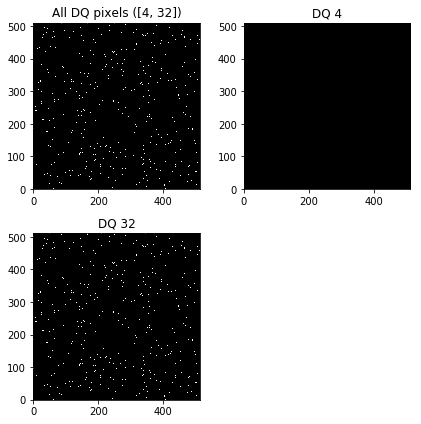

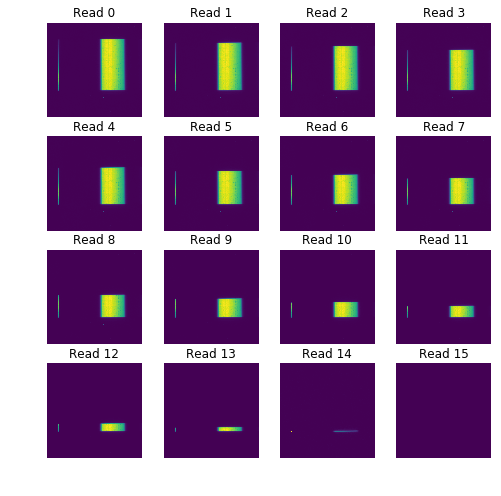

Background median found to be 16.9255485535 electrons per pixel
Background median found to be 13.5863685608 electrons per pixel
Background median found to be 11.6822624207 electrons per pixel
Background median found to be 9.60829544067 electrons per pixel
Background median found to be 8.66901779175 electrons per pixel
Background median found to be 7.95866203308 electrons per pixel
Background median found to be 8.33875656128 electrons per pixel
Background median found to be 4.86524009705 electrons per pixel
Background median found to be 7.46840858459 electrons per pixel
Background median found to be 7.63516235352 electrons per pixel
Background median found to be 7.43290042877 electrons per pixel
Background median found to be 7.78012561798 electrons per pixel
Background median found to be 8.38153076172 electrons per pixel
Background median found to be 8.23261737823 electrons per pixel


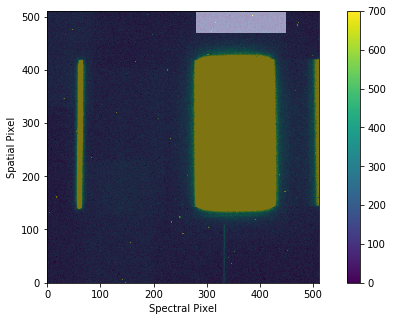

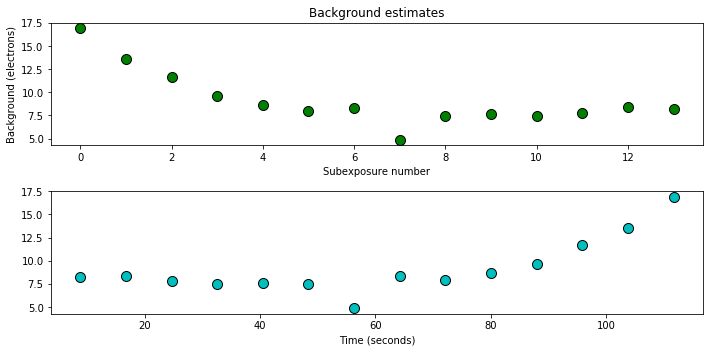

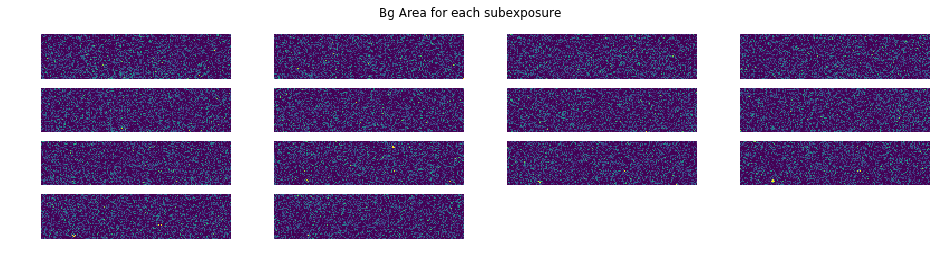

Removed 36 CR pixels from subexposure 1
Removed 29 CR pixels from subexposure 2
Removed 30 CR pixels from subexposure 3
Removed 30 CR pixels from subexposure 4
Removed 32 CR pixels from subexposure 5
Removed 30 CR pixels from subexposure 6
Removed 34 CR pixels from subexposure 7
Removed 31 CR pixels from subexposure 8
Removed 31 CR pixels from subexposure 9
Removed 38 CR pixels from subexposure 10
Removed 35 CR pixels from subexposure 11
Removed 47 CR pixels from subexposure 12
Removed 45 CR pixels from subexposure 13
Removed 32 CR pixels from subexposure 14


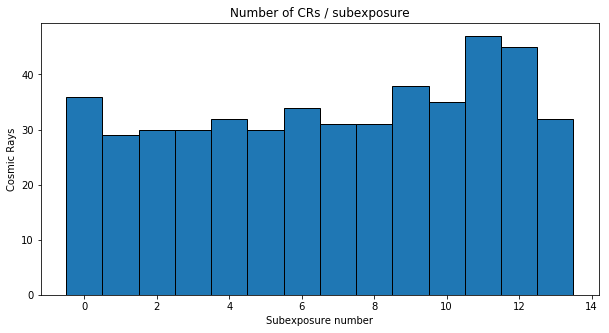

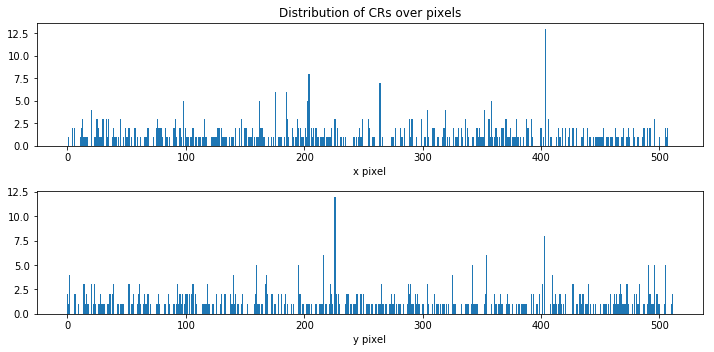

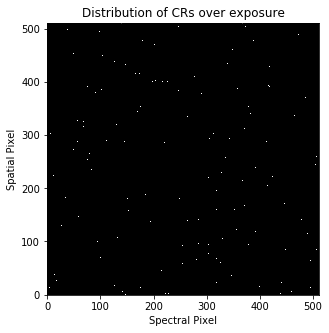

Forward scan
Direct image location of (250.484,280.805)
Subexposure 0
Interpolated image to reference wavelength (0th row)


Subexposure 1
Interpolated image to reference wavelength (0th row)


Subexposure 2
Interpolated image to reference wavelength (0th row)


Subexposure 3
Interpolated image to reference wavelength (0th row)


Subexposure 4
Interpolated image to reference wavelength (0th row)


Subexposure 5
Interpolated image to reference wavelength (0th row)


Subexposure 6
Interpolated image to reference wavelength (0th row)


Subexposure 7
Interpolated image to reference wavelength (0th row)


Subexposure 8
Interpolated image to reference wavelength (0th row)


Subexposure 9
Interpolated image to reference wavelength (0th row)


Subexposure 10
Interpolated image to reference wavelength (0th row)


Subexposure 11
Interpolated image to reference wavelength (0th row)


Subexposure 12
Interpolated image to reference wavelength (0th row)


Subexposure 13
Interpolated image to referen

/home/jacob/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


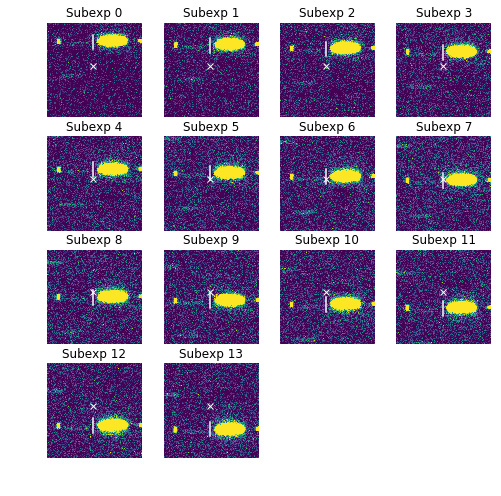

Saving reduced file to /home/jacob/hstscan/data/test/
Saving reduced exposure to /home/jacob/hstscan/data/test/iccz22ckq_red.fits...
Reduction took 25.19s
########################################
###########Finished Reduction###########
########################################


In [2]:
exp = pipe.reduce_exposure( 'iccz22ckq_ima.fits', pdf=False, logger=False,
                              conf_file = './data/test/red.conf')

########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/test/iccz22ckq_ima.fits
For configuration, see conf file: ./data/test/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 350.484 in spatial direction
Using flux for variance estimate
Not using optimal extraction - results will be noisy
Extracting from subexposure 2
Spectrum located at pixel 350.484 in spatial direction
Extracting from subexposure 3
Spectrum located at pixel 350.484 in spatial direction
Extracting from subexposure 4
Spectrum located at pixel 350.484 in spatial direction
Extracting from subexposure 5
Spectrum located at pixel 350.484 in spatial direction
Extracting from subexposure 6
Spectrum located at pixel 350.484 in spatial direction
Extracting from subexposure 7
Spectrum located at pixel 350.484 in spatial d

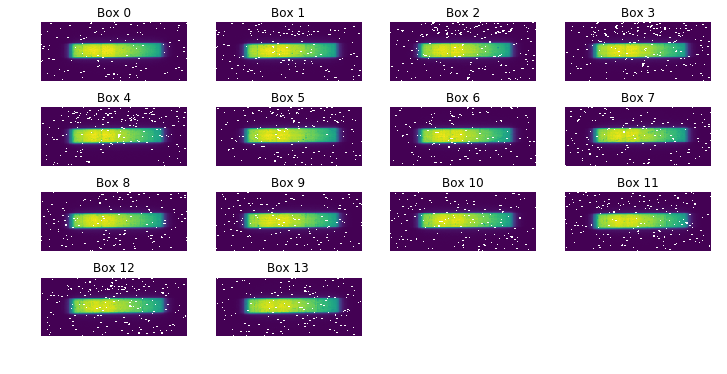

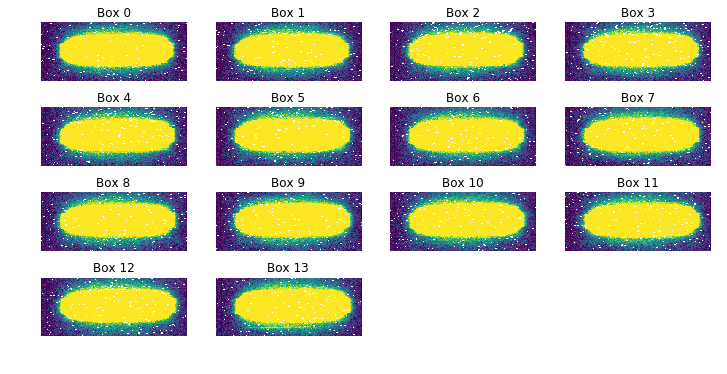

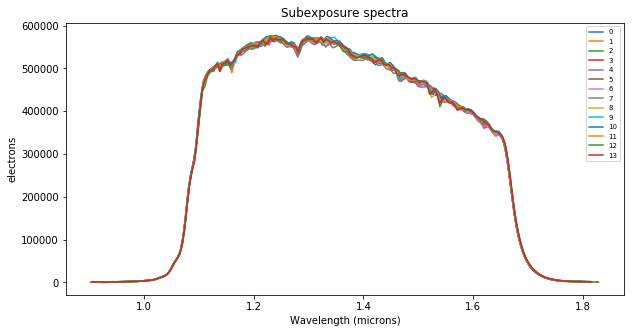

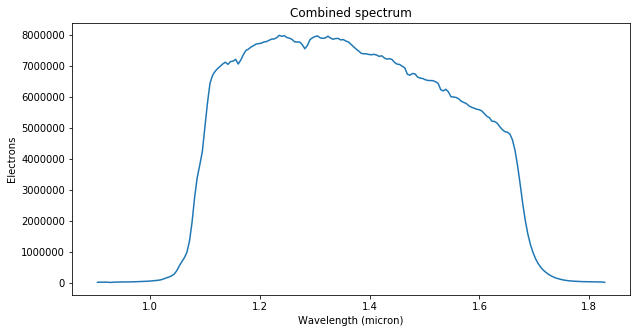

Saving spectrum to /home/jacob/hstscan/data/test/iccz22ckq_spec.txt
Extraction took 1.40s
########################################
###########Finished Extraction##########
########################################


In [13]:
exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, conf_file='./data/test/ext.conf',
                                        pdf=False, logger=False)

# Run for all exposures
From the terminal run: "python run_pipeline.py", and it should reduce every exposure in "exposure.lis"

Should take about 20 minutes on 2 cores

This will generate partial exposure_red.fits files and exposure_spec.txt spectra for each exposure

# Look at outputs

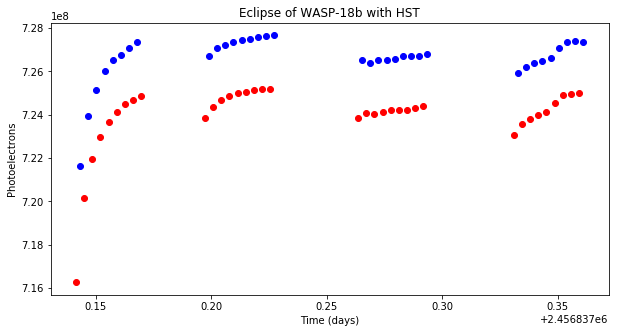

In [20]:
reload(data)
times, fluxes, errs, directions = data.broadband_fluxes(
        files='eclipse.lis', source_dir='./data/test/',
        wmin=1.14,wmax=1.6,
        direction='a', plot=True)
p.xlabel('Time (days)')
p.ylabel('Photoelectrons')
p.title('Eclipse of WASP-18b with HST')
p.show()

# Profile of the pipeline

In [10]:
%load_ext snakeviz

In [11]:
%%snakeviz
exp = pipe.reduce_exposure( 'iccz22ckq_ima.fits', conf_file = './data/test/red.conf')
exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, conf_file='./data/test/ext.conf')

Saving reduced exposure to /home/jacob/hstscan/data/test/iccz22ckq_red.fits...
 
*** Profile stats marshalled to file u'/tmp/tmp4qdhZk'. 


Half of the time is spent doing the wavelength calibration. Just changed this so likely can be optimized later.

# To do list
- Error handling
- Neater extraction algorithm